In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv('data_process1.csv')
dataset = data_df

In [3]:
#Creating k folds
def fold_i_of_k(dataset, i, k):
    n = len(dataset)
    return len(dataset[n*(i-1)//k:n*i//k])

Accuracy for fold  1 is:  0.728070175439
Accuracy for fold  2 is:  0.964912280702
Accuracy for fold  3 is:  0.721739130435
Accuracy for fold  4 is:  0.824561403509
Accuracy for fold  5 is:  0.878260869565
Accuracy for fold  6 is:  0.798245614035
Accuracy for fold  7 is:  0.5
Accuracy for fold  8 is:  0.660869565217
Accuracy for fold  9 is:  0.517543859649
Accuracy for fold  10 is:  0.565217391304

Cross validation accuracy of Logistic Regression is:  0.715942028986
F1 score of Logistic Regression is:  0.712815116536


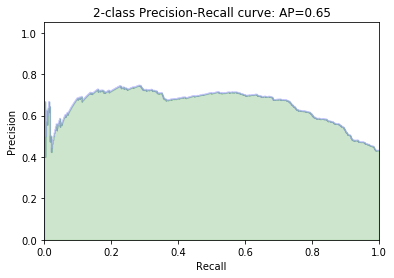

In [4]:
#Logistic Regression
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
  
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))

    lr = LogisticRegression(random_state=4)
    lr.fit(X_train,y_train)
    lr_pred = lr.predict(X_test)
    result_pred = np.concatenate((result_pred,lr_pred))
    
    y_score = lr.decision_function(X_test)
    result_score = np.concatenate((result_score,y_score))
   
    ac = accuracy_score(y_test,lr_pred)
    print("Accuracy for fold ",counter,"is: ",ac);
    f = f1_score(y_test, lr_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K
print("\nCross validation accuracy of Logistic Regression is: ",total_ac)
print("F1 score of Logistic Regression is: ",total_f)

#**************Precision-Recall curve******************/


precision, recall, _ = precision_recall_curve(y, result_score)
average_precision = average_precision_score(y, result_score)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('p2.png')

Fold  1
0.728070175439
Fold  2
0.833333333333
Fold  3
0.808695652174
Fold  4
0.728070175439
Fold  5
0.75652173913
Fold  6
0.69298245614
Fold  7
0.587719298246
Fold  8
0.547826086957
Fold  9
0.570175438596
Fold  10
0.617391304348
Cross validation decision tree accuracy is:  0.68707856598
F1 score is:  0.688703422914


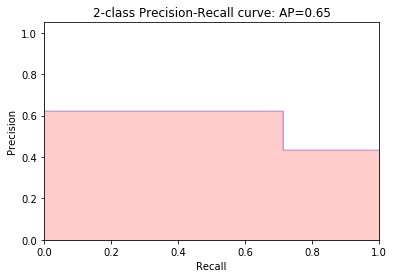

In [5]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))

    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    dt_pred = dt.predict(X_test)
    result_pred = np.concatenate((result_pred,dt_pred))

    y_scores = dt.predict_proba(X_test)[:, 1]
    result_score = np.concatenate((result_score,y_scores))
    ac = accuracy_score(y_test,dt_pred)
    print(ac)
    f = f1_score(y_test, dt_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation decision tree accuracy is: ",total_ac)
print("F1 score is: ",total_f)
precision, recall, _ = precision_recall_curve(y, result_score)

plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('p3.png')

Fold  1
0.631578947368
Fold  2
0.868421052632
Fold  3
0.704347826087
Fold  4
0.798245614035
Fold  5
0.886956521739
Fold  6
0.789473684211
Fold  7
0.614035087719
Fold  8
0.6
Fold  9
0.570175438596
Fold  10
0.634782608696
Cross validation random forest accuracy is:  0.709801678108
F1 score is:  0.709860790672


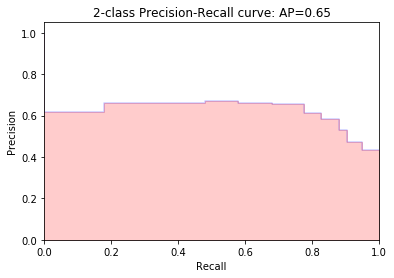

In [6]:
##Random Forest
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))

    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    result_pred = np.concatenate((result_pred,rfc_pred))

    y_scores = rfc.predict_proba(X_test)[:, 1]
    result_score = np.concatenate((result_score,y_scores))
    ac = accuracy_score(y_test,rfc_pred)
    print(ac)
    f = f1_score(y_test, rfc_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation random forest accuracy is: ",total_ac)
print("F1 score is: ",total_f)
precision, recall, _ = precision_recall_curve(y, result_score)

plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('p4.png')

Fold  1
0.640350877193
Fold  2
0.947368421053
Fold  3
0.904347826087
Fold  4
0.789473684211
Fold  5
0.895652173913
Fold  6
0.666666666667
Fold  7
0.771929824561
Fold  8
0.6
Fold  9
0.622807017544
Fold  10
0.617391304348
Cross validation accuracy for linear svm is:  0.745598779558
F1 score is:  0.746045091336


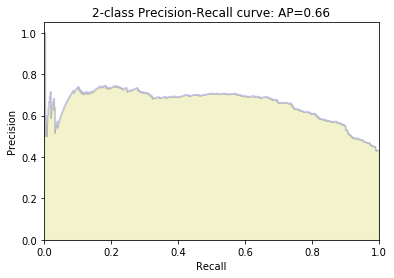

In [7]:
#SVM Linear
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))

    linearsvm = SVC(kernel='linear', C=0.624974423446755,probability=True)
    linearsvm.fit(X_train,y_train)
    linearsvm_pred = dt.predict(X_test)
    result_pred = np.concatenate((result_pred,linearsvm_pred))

    y_score = linearsvm.decision_function(X_test)
    result_score = np.concatenate((result_score,y_score))

    ac = accuracy_score(y_test,linearsvm_pred)
    print(ac);
    f = f1_score(y_test, linearsvm_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation accuracy for linear svm is: ",total_ac)
print("F1 score is: ",total_f)

#Linear SVM
average_precision = average_precision_score(y, result_score)
precision, recall, _ = precision_recall_curve(y, result_score)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='y')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('p5.png')

Fold  1
0.684210526316
Fold  2
0.973684210526
Fold  3
0.721739130435
Fold  4
0.745614035088
Fold  5
0.878260869565
Fold  6
0.815789473684
Fold  7
0.59649122807
Fold  8
0.686956521739
Fold  9
0.456140350877
Fold  10
0.6
Cross validation accuracy for rbf svm is:  0.71588863463
F1 score is:  0.71690962577


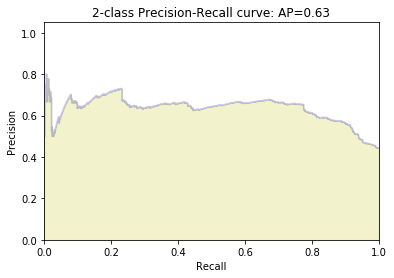

In [8]:
#Rbf SVM
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))
    rbfsvm = SVC(kernel='rbf', C= 57.296107349133315,gamma=0.004059323094735449,probability=True)
    rbfsvm.fit(X_train,y_train)
    rbfsvm_pred = rbfsvm.predict(X_test)
    result_pred = np.concatenate((result_pred,rbfsvm_pred))
    y_score = rbfsvm.decision_function(X_test)
    result_score = np.concatenate((result_score,y_score))
    ac = accuracy_score(y_test,rbfsvm_pred)
    print(ac);
    f = f1_score(y_test, rbfsvm_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation accuracy for rbf svm is: ",total_ac)
print("F1 score is: ",total_f)

average_precision = average_precision_score(y, result_score)
precision, recall, _ = precision_recall_curve(y, result_score)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='y')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('p6.png')

Fold  1
0.745614035088
Fold  2
0.868421052632
Fold  3
0.608695652174
Fold  4
0.833333333333
Fold  5
0.817391304348
Fold  6
0.710526315789
Fold  7
0.421052631579
Fold  8
0.55652173913
Fold  9
0.578947368421
Fold  10
0.434782608696
Cross validation accuracy for poly svm is:  0.657528604119
F1 score is:  0.638934381769


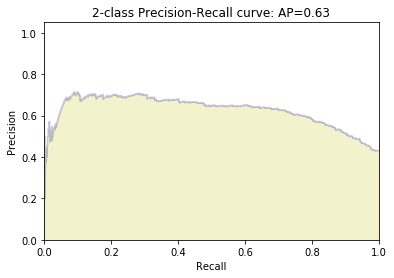

In [9]:
#Polynomial SVM
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))
    polysvm = SVC(kernel='poly',C= 44.862787773900145,gamma=0.017893797724654898,probability=True)
    polysvm.fit(X_train,y_train)
    polysvm_pred = polysvm.predict(X_test)
    result_pred = np.concatenate((result_pred,polysvm_pred))
  
    y_score = polysvm.decision_function(X_test)
    result_score = np.concatenate((result_score,y_score))
    ac = accuracy_score(y_test,polysvm_pred)
    print(ac)

    f = f1_score(y_test, polysvm_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation accuracy for poly svm is: ",total_ac)
print("F1 score is: ",total_f)

average_precision = average_precision_score(y, result_score)
precision, recall, _ = precision_recall_curve(y, result_score)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='y')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('p7.png')

### Voting classifier 

In [ ]:
#soft voting
data_df = pd.read_csv('data_process1.csv')
dataset = data_df
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_sco = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))
    
    clf1 = LogisticRegression(random_state=4)
    clf2 = RandomForestClassifier(random_state=4)
    clf3 = SVC(kernel='linear', C=0.624974423446755,probability=True)
    clf4 = SVC(kernel='rbf', C= 57.296107349133315,gamma=0.004059323094735449,probability=True)
    clf5 = SVC(kernel='poly',C= 44.862787773900145,gamma=0.017893797724654898,probability=True)
    clf6 = dt = DecisionTreeClassifier(random_state=4)
    eclf = VotingClassifier(estimators=[('logistic', clf1), ('random forest', clf2), ('svm linear', clf3),('svm rbf', clf4),('svm poly', clf5),('decision tree', clf6)], weights=[1,1,1,1,1,1], voting='soft')
    
    eclf = eclf.fit(X_train, y_train)
    eclf.fit(X_train,y_train)
    eclf_pred = eclf.predict(X_test)
    result_pred = np.concatenate((result_pred,eclf_pred))
    
    ac = accuracy_score(y_test,eclf_pred)
    print(ac)

    f = f1_score(y_test, eclf_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation accuracy for voting classifier: ",total_ac)
print("F1 score is: ",total_f)


Fold  1
0.719298245614
Fold  2
0.982456140351
Fold  3
0.791304347826
Fold  4
0.80701754386
Fold  5
0.852173913043
Fold  6
0.815789473684
Fold  7
0.570175438596
Fold  8
0.617391304348
Fold  9
0.561403508772
Fold  10
0.686956521739
Cross validation accuracy for voting classifier:  0.740396643783
F1 score is:  0.741280336156


In [ ]:
#hard voting
data_df = pd.read_csv('data_process1.csv')
dataset = data_df
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_sco = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))
    
    clf1 = LogisticRegression(random_state=4)
    clf2 = RandomForestClassifier(random_state=4)
    clf3 = SVC(kernel='linear', C=0.624974423446755,probability=True)
    clf4 = SVC(kernel='rbf', C= 57.296107349133315,gamma=0.004059323094735449,probability=True)
    clf5 = SVC(kernel='poly',C= 44.862787773900145,gamma=0.017893797724654898,probability=True)
    clf6 = dt = DecisionTreeClassifier(random_state=4)
    eclf = VotingClassifier(estimators=[('logistic', clf1), ('random forest', clf2), ('svm linear', clf3),('svm rbf', clf4),('svm poly', clf5),('decision tree', clf6)], voting='hard')
    
    eclf = eclf.fit(X_train, y_train)
    eclf.fit(X_train,y_train)
    eclf_pred = eclf.predict(X_test)
    result_pred = np.concatenate((result_pred,eclf_pred))
    
    ac = accuracy_score(y_test,eclf_pred)
    print(ac)

    f = f1_score(y_test, eclf_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation accuracy for voting classifier: ",total_ac)
print("F1 score is: ",total_f)

In [ ]:
#!pip install mlxtend  
#!pip install numpy==1.13.3

In [ ]:
from sklearn import model_selection
import numpy as np
dataset = data_df.as_matrix()
X = dataset[:,0:11]
y = dataset[:,11:12]
X = preprocessing.scale(X)

clf1 = LogisticRegression(random_state=4)
clf2 = RandomForestClassifier(random_state=4)
clf3 = SVC(kernel='linear', C=0.624974423446755,probability=True)
clf4 = SVC(kernel='rbf', C= 57.296107349133315,gamma=0.004059323094735449,probability=True)
clf5 = SVC(kernel='poly',C= 44.862787773900145,gamma=0.017893797724654898,probability=True)
clf6 = dt = DecisionTreeClassifier(random_state=4)

print('10-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'SVM Linear', 'SVM rbf', 'SVM poly' , 'Decision Tree']

for clf, label in zip([clf1, clf2, clf3, clf4,clf5,clf6], labels):

    scores = model_selection.cross_val_score(clf, X, y.ravel(),cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))

In [ ]:
#soft voting classifier
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5,clf6], weights=[1,1,1,1,1,1],voting='soft')

labels = ['Logistic Regression', 'Random Forest', 'SVM Linear', 'SVM rbf', 'SVM poly' , 'Decision Tree', 'soft ensemble']
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, eclf], labels):
    scores = model_selection.cross_val_score(clf, X, y.ravel(), cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [ ]:
#hard voting classifier
eclf3 = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5,clf6], voting='hard')

labels = ['Logistic Regression', 'Random Forest', 'SVM Linear', 'SVM rbf', 'SVM poly' , 'Decision Tree', 'hard ensemble']
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, eclf3], labels):
    scores = model_selection.cross_val_score(clf, X, y.ravel(), cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [ ]:
#Voting classifier on entire data
dataset = data_df.as_matrix()
X = dataset[:,0:11]
y = dataset[:,11:12]
standardized_X = preprocessing.scale(X)

clf1 = LogisticRegression(random_state=4)
clf2 = RandomForestClassifier(random_state=4)
clf3 = SVC(kernel='linear', C=0.624974423446755,probability=True)
clf4 = SVC(kernel='rbf', C= 57.296107349133315,gamma=0.004059323094735449,probability=True)
clf5 = SVC(kernel='poly',C= 44.862787773900145,gamma=0.017893797724654898,probability=True)
clf6 = dt = DecisionTreeClassifier(random_state=4)

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5,clf6],voting='hard')

labels = ['Logistic Regression', 'Random Forest', 'SVM Linear', 'SVM rbf', 'SVM poly' , 'Decision Tree', 'ensemble']

eclf = eclf.fit(standardized_X , y.ravel())

vote_pred = eclf.predict(standardized_X)
ac = accuracy_score(y.ravel(),vote_pred)
print("Accuracy of voting classifier is: ",ac)

f = f1_score(y.ravel(), vote_pred, average='weighted')
print("F1-Score of voting classifier is: ",f)

sco = eclf.predict_proba(standardized_X )[:,1]
average_precision = average_precision_score(y.ravel(), sco)
precision, recall, _ = precision_recall_curve(y.ravel(), sco)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.savefig('p8.png')